<a href="https://colab.research.google.com/github/YoshifumiMiyagi/VinDr-PCXR/blob/main/VinDr_PCXR_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [84]:
annotation = pd.read_csv('/content/drive/MyDrive/annotations_train.csv')
annotation_test = pd.read_csv('/content/drive/MyDrive/annotations_test.csv')
annotation

,image_id,rad_ID,class_name,x_min,y_min,x_max,y_max,class_id
0,03d56a9709a81b2e9d6afbc6647c8730,R3,Boot-shaped heart,378.760010,401.416645,835.143248,661.678438,0
1,48f7ba0b0fd5ab847ee87df2aed5cfc9,R3,Peribronchovascular interstitial opacity,247.196368,412.000819,441.763442,830.320028,1
2,48f7ba0b0fd5ab847ee87df2aed5cfc9,R3,Peribronchovascular interstitial opacity,613.631024,364.980443,902.238850,827.077243,1
3,74f8648d742bbcce79d67c967de5552d,R3,Peribronchovascular interstitial opacity,1008.515903,665.439667,1324.430364,1265.465119,1
4,74f8648d742bbcce79d67c967de5552d,R3,Peribronchovascular interstitial opacity,453.015307,635.756429,724.404911,1242.142575,1
...,...,...,...,...,...,...,...,...
10366,5fac26aaebaab98a10f1f99fff3d4e14,R1,No finding,NaN,NaN,NaN,NaN,7
10367,c3479c0b297b951ab065ce9474248e27,R1,No finding,NaN,NaN,NaN,NaN,7
10368,4208b18c18aa408cf5bd40d13b796687,R1,No finding,NaN,NaN,NaN,NaN,7
10369,4170427203097ce7e38cf83a90eb3e74,R1,No finding,NaN,NaN,NaN,NaN,7


In [105]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
df_new = pd.DataFrame(ohe.fit_transform(annotation.loc[:,"class_name"].values.reshape(-1, 1)),
                      columns=ohe.get_feature_names_out(),
                      index = annotation['image_id'],
                      dtype=np.int8)
df_new.columns = ['_'.join(col.split('_')[1:]) for col in df_new.columns]
df_new

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Anterior mediastinal mass,Aortic enlargement,Atelectasis,Boot-shaped heart,Bronchectasis,Bronchial thickening,Calcification,Cardiomegaly,Chest wall mass,Clavicle fracture,...,Other nodule/mass,Other opacity,Paraveterbral mass,Peribronchovascular interstitial opacity,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,Reticulonodular opacity,Stomach on the right side
image_id,,,,,,,,,,,,,,,,,,,,,
03d56a9709a81b2e9d6afbc6647c8730,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48f7ba0b0fd5ab847ee87df2aed5cfc9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48f7ba0b0fd5ab847ee87df2aed5cfc9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
74f8648d742bbcce79d67c967de5552d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
74f8648d742bbcce79d67c967de5552d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5fac26aaebaab98a10f1f99fff3d4e14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c3479c0b297b951ab065ce9474248e27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4208b18c18aa408cf5bd40d13b796687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
A = df_new.groupby(level=0).sum()
A

,Anterior mediastinal mass,Aortic enlargement,Atelectasis,Boot-shaped heart,Bronchectasis,Bronchial thickening,Calcification,Cardiomegaly,Chest wall mass,Clavicle fracture,...,Other nodule/mass,Other opacity,Paraveterbral mass,Peribronchovascular interstitial opacity,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,Reticulonodular opacity,Stomach on the right side
image_id,,,,,,,,,,,,,,,,,,,,,
000295d6ff55184f19d99e95f93c3a55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0008e7acbcdf2fedd05cc236e5594074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
000f60ed28579e82c402b99fcff67ef5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0018c771a8e8c20e6d7d5bc8e64181b4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001c350dcc2ecc107afb19512f33b927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe07cb11d4970c8789db030251885cc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffe90d9828f072fd77cdd68f6118a010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffe9705c781f7e370e3edea51eae9d88,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [109]:
df_new_test = pd.DataFrame(ohe.transform(annotation_test.loc[:,"class_name"].values.reshape(-1, 1)),
                      columns=ohe.get_feature_names_out(),
                      index = annotation_test['image_id'],
                      dtype=np.int8)
df_new_test.columns = ['_'.join(col.split('_')[1:]) for col in df_new.columns]
A_test = df_new_test.groupby(level=0).sum()

In [28]:
label = pd.read_csv('/content/drive/MyDrive/image_labels_train.csv')
label_test = pd.read_csv('/content/drive/MyDrive/image_labels_test.csv')
label

,image_id,rad_ID,No finding,Bronchitis,Brocho-pneumonia,Other disease,Bronchiolitis,Situs inversus,Pneumonia,Pleuro-pneumonia,Diagphramatic hernia,Tuberculosis,Congenital emphysema,CPAM,Hyaline membrane disease,Mediastinal tumor,Lung tumor
0,6cb53aff85c71b98ad13d67a131708c6,R3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40414c05687cdb156823c156967b13f0,R3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0e4a464dfbf8abc6333c82f1b77b6455,R3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f4d3fab0b71381e6b237dc36301e85a0,R3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b58c9b1c89978a0b1f8533b7a2ca1088,R3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,5fac26aaebaab98a10f1f99fff3d4e14,R1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7724,c3479c0b297b951ab065ce9474248e27,R1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7725,4208b18c18aa408cf5bd40d13b796687,R1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7726,4170427203097ce7e38cf83a90eb3e74,R1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
L=[]
for i in label.columns[2:]:
    a = label[i].value_counts()
    L.append(a)
Lable = pd.DataFrame(L)
Lable.index = label.columns[2:]
Lable.columns =  ['Case','Control']
Lable

,Case,Control
No finding,5143,2585
Bronchitis,842,6886
Brocho-pneumonia,545,7183
Other disease,412,7316
Bronchiolitis,497,7231
Situs inversus,11,7717
Pneumonia,392,7336
Pleuro-pneumonia,6,7722
Diagphramatic hernia,3,7725
Tuberculosis,14,7714


from matplotlib import pyplot as plt
_df_0['Case'].plot(kind='hist', bins=20, title='Case')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Control'].plot(kind='hist', bins=20, title='Control')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Case', y='Control', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Case'].plot(kind='line', figsize=(8, 4), title='Case')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Control'].plot(kind='line', figsize=(8, 4), title='Control')
plt.gca().spines[['top', 'right']].set_visible(False)

In [30]:
label4 = label[(label['Bronchitis']==1)|(label['Brocho-pneumonia']==1)|(label['Bronchiolitis']==1)|(label['Pneumonia']==1)].loc[:,['image_id','Bronchitis','Brocho-pneumonia','Bronchiolitis','Pneumonia']]
label_test4 = label_test[(label_test['Bronchitis']==1)|(label_test['Brocho-pneumonia']==1)|(label_test['Bronchiolitis']==1)|(label_test['Pneumonia']==1)].loc[:,['image_id','Bronchitis','Brocho-pneumonia','Bronchiolitis','Pneumonia']]
label4.dtypes,label_test4.dtypes

(image_id             object
 Bronchitis          float64
 Brocho-pneumonia    float64
 Bronchiolitis       float64
 Pneumonia           float64
 dtype: object,
 image_id             object
 Bronchitis          float64
 Brocho-pneumonia    float64
 Bronchiolitis       float64
 Pneumonia           float64
 dtype: object)

In [23]:
df_label = label4.iloc[:,1:].idxmax(axis=1)
df = pd.concat([label4.iloc[:,0],df_label],axis=1)
df.columns = ['image_id','class_name']
df

,image_id,class_name
0,6cb53aff85c71b98ad13d67a131708c6,Pneumonia
1,40414c05687cdb156823c156967b13f0,Bronchiolitis
2,0e4a464dfbf8abc6333c82f1b77b6455,Bronchiolitis
3,f4d3fab0b71381e6b237dc36301e85a0,Bronchiolitis
6,11dc4e586a88cb85ac82db00460cd08a,Bronchiolitis
...,...,...
2573,571a7548a98912422fc79bc2d2291ac3,Brocho-pneumonia
2575,622dc1fc74c209767816b0489d7b55df,Pneumonia
2578,f28a594523655b3fbaf28eb5cd9035fb,Bronchitis
2581,868ea87d278cc501897d2ca0e18b8350,Bronchiolitis


In [111]:
#Df = pd.merge(annotation.loc[:,["image_id","class_name","x_min","y_min","x_max","y_max"]],df,on='image_id',how='inner')
Df = pd.merge(A,df,on='image_id',how='inner')
Df

,image_id,Anterior mediastinal mass,Aortic enlargement,Atelectasis,Boot-shaped heart,Bronchectasis,Bronchial thickening,Calcification,Cardiomegaly,Chest wall mass,...,Other opacity,Paraveterbral mass,Peribronchovascular interstitial opacity,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,Reticulonodular opacity,Stomach on the right side,class_name
0,0008e7acbcdf2fedd05cc236e5594074,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Brocho-pneumonia
1,008000749ecc9074e80562f9f90091fd,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,Bronchiolitis
2,00e5c7c8c64dcf9c2b85f2d92d67a1e3,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,Bronchiolitis
3,00e898fc3a6a95d56510c5c87fdbc03a,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,Brocho-pneumonia
4,01010180f98c184adc806d3bb53dd8e1,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,Bronchitis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,ffc1fb41737cbc399d23c69cda1a435e,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,Bronchitis
2153,ffd4896fa3a18858b2cec3328605ac5f,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Brocho-pneumonia
2154,ffe07cb11d4970c8789db030251885cc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
2155,ffe9705c781f7e370e3edea51eae9d88,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Pneumonia


In [112]:
df_label_test4 = label_test4.iloc[:,1:].idxmax(axis=1)
df_test = pd.concat([label_test4.iloc[:,0],df_label_test4],axis=1)
df_test.columns = ['image_id','class_name']
#Df_test = pd.merge(annotation_test.loc[:,["image_id","class_name","x_min","y_min","x_max","y_max"]],df_test,on='image_id',how='inner')
Df_test = pd.merge(A_test,df_test,on='image_id',how='inner')
Df_test

,image_id,,,,,,,,,,...,,,,,,,,,,class_name
0,008de51718bcafddc938be6eff91a42a,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchitis
1,015feabba4c9fb9997ef63a932587bff,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Bronchitis
2,020bb005abcb4b0d7c8f07504fc2ed2e,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Bronchitis
3,02573bf847790859c3857a1f68d9eea4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,Brocho-pneumonia
4,02ca701a9f51279dce17d8565db1dde5,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,Bronchitis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,fca37c7b7296bab30f9cbdc12089ebe7,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,Bronchiolitis
405,fd795cf05a0e0d78023d68f2daa1f94d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchitis
406,fdfbac4ce475828385e3977b061d82e0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Brocho-pneumonia
407,fe3f90585717f5556e58bb0a553c077f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Pneumonia


In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x_train, y_train = Df.iloc[:,1:-1].values, le.fit_transform(Df["class_name"])
x_test, y_test = Df_test.iloc[:,1:-1].values, le.transform(Df_test["class_name"])

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2157, 37), (409, 37), (2157,), (409,))

In [123]:
le.classes_

array(['Brocho-pneumonia', 'Bronchiolitis', 'Bronchitis', 'Pneumonia'],
      dtype=object)

# Model

In [119]:
!pip install shap

In [120]:
from xgboost import XGBClassifier, plot_importance

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

#import optuna
import shap

In [131]:
xgbc_default = XGBClassifier()
xgbc_default.fit(x_train, y_train)
y_pred = xgbc_default.predict(x_test)
y_true = y_test

df_report = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)).T
cm_default = confusion_matrix(y_true, y_pred )
df_cm = pd.DataFrame(cm_default, columns=le.classes_, index =le.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'


df_report.set_axis(['Brocho-pneumonia', 'Bronchiolitis', 'Bronchitis', 'Pneumonia', "accuracy", "macro avg","weighted avg"], axis="index")

,precision,recall,f1-score,support
Brocho-pneumonia,0.615385,0.579710,0.597015,69.000000
Bronchiolitis,0.508621,0.694118,0.587065,85.000000
Bronchitis,0.630058,0.626437,0.628242,174.000000
Pneumonia,0.890909,0.604938,0.720588,81.000000
accuracy,0.628362,0.628362,0.628362,0.628362
macro avg,0.661243,0.626301,0.633227,409.000000
weighted avg,0.654005,0.628362,0.632705,409.000000


<Axes: xlabel='Predicted', ylabel='Actual'>

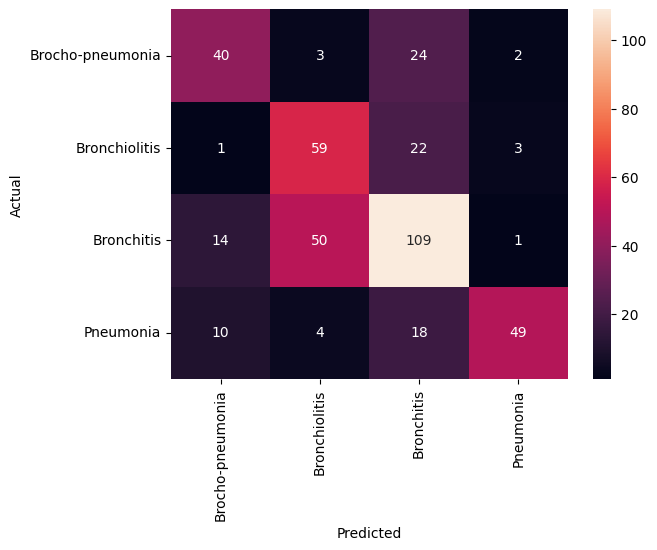

In [132]:
sns.heatmap(df_cm, annot=True,fmt=".0f")